In [25]:
import pandas as pd
import numpy as np

In [26]:
## collections으로서 Counter 클래스를 가져온다.
## Counter란? 데이터의 빈도수를 계산하는 데 유용한 도구
from collections import Counter

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [29]:
df['item_price'] = df['item_price'].str.replace('$', '')
df['item_price'].head()

,item_price
0,2.39
1,3.39
2,3.39
3,2.39
4,16.98


- 데이터 타입이 object인 경우, 이는 문자열뿐만 아니라 숫자, 날짜 등 다양한 데이터 타입이 포함될 수 있음
> Series 또는 DataFrame 내 문자열 데이터에만 적용할 수 있는 메서드들을 제공하기 위해 **'str'**를 사용

In [30]:
print(df['item_price'].dtypes)

df['item_price'] = df['item_price'].astype('float')
print(df['item_price'].dtypes)

object
float64


## Create a histogram of the top 5 items bought.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [32]:
df.groupby('item_name').head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
3363,1349,1,Chicken Salad,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice...",8.49
3471,1395,1,Veggie Salad,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",8.49
3502,1406,1,Steak Salad,"[[Lettuce, Fajita Veggies]]",8.69
3749,1499,1,Carnitas Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.89


- count(): 리스트, 문자열 등 단일 값의 빈도만 반환하는 메소드 (특정 값의 빈도를 계산)
> from collections import Counter
> - Counter(): 주어진 iterable에서 모든 값의 빈도 수를 계산해 '딕셔너리' 형태로 반환

In [33]:
x = df['item_name']

item_count = Counter(x) # Counter 객체는 딕셔너리 구조를 가짐

df = pd.DataFrame.from_dict(item_count, orient='index')
# orient='index': 키(key)를 행 인덱스로 설정

df.head()

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726


- from_dict(): dictionary -> DataFrame으로 변환해주는 함수
> - Pandas의 DataFrame 클래스 메소드이기 때문에 **pd.DataFrame**을 무.조.건 붙여줘야 한다.

In [34]:
print(type(df[0]))

<class 'pandas.core.series.Series'>


In [35]:
df = df[0].sort_values(ascending = True)[45:50]

### import matplotlib.pyplot as plt
> Python에서 데이터를 시각화할 때 가장 널리 사용되는 도구 중 하나이다. 특히 Plot을 생성하고 조작하는 데 필요한 함수 제공

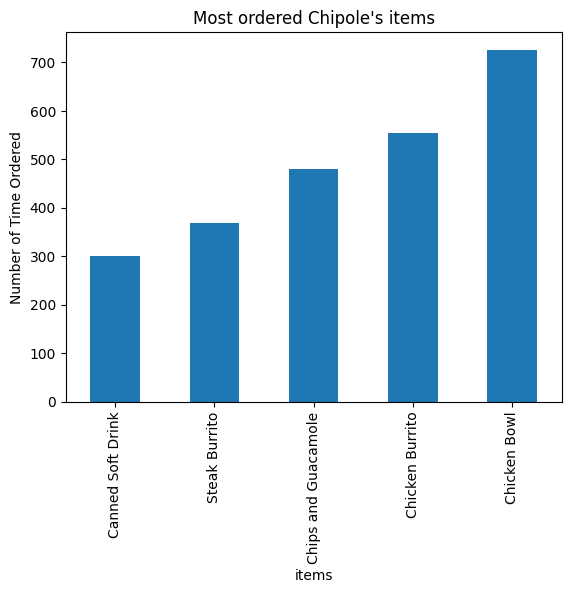

In [36]:
df.plot(kind='bar')

import matplotlib.pyplot as plt

plt.xlabel('items')
plt.ylabel('Number of Time Ordered')
plt.title('Most ordered Chipole\'s items')

plt.show()

## Create a scatterplot with the number of items ordered per order price.
Hint: Price should be in the X-azis and Items ordered in the Y-axis.
> 주문 가격당 주문한 품목 수로 분산형 차트

In [41]:
copy = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
copy.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [42]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [43]:
copy['item_price'] = copy['item_price'].str.replace('$', '').astype('float')
print(copy['item_price'].dtypes)

float64


In [46]:
# Create a scatterplot with the number of items ordered per order price.
orders = copy.groupby('order_id').sum() # 그룹별 합계
orders.head()

,quantity,item_name,choice_description,item_price
order_id,,,,
1,4,Chips and Fresh Tomato SalsaIzzeNantucket Nect...,[Clementine][Apple],11.56
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3,2,Chicken BowlSide of Chips,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",12.67
4,2,Steak BurritoSteak Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",21.00
5,2,Steak BurritoChips and Guacamole,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",13.70


(0.0, 36.7)

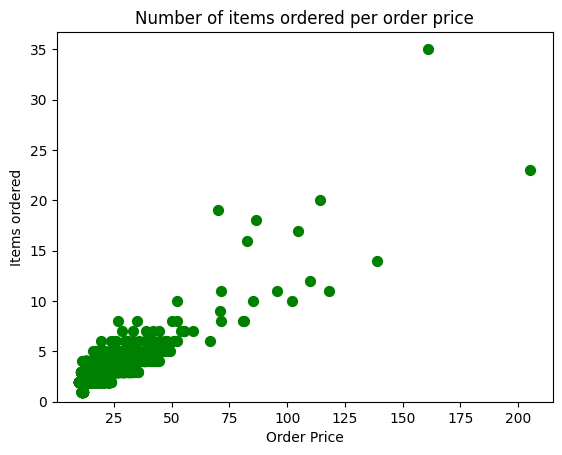

In [52]:
plt.scatter(x = orders['item_price'], y=orders['quantity'], s=50, c='green')

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

# plt.ylim(): 그래프의 Y축 범위를 설정하거나 현재 범위를 확인하는 데 사용하는 함수

### df.plot() => Pandas의 메소드
- df.plot(): Pandas 라이브러리에서 제공하는 데이터프레임 전용 메서드
- df.plot(kind='bar', x='category', y='Values', title="Bar Plot")

### plt.scatter() => Matplotlib의 함수
- plt.scatter(): Matplotlib의 Pyplot 모듈에 포함된 함수